# Scoreing Algorithm

## Importing the Needed Libraries

In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Opening the Total Label File

In [2]:
curPlace = os.getcwd() + '\output files\Total Labels.xlsx'

## Extracting the Total Labels

In [3]:
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
Labels = data[:,2]

# prioritizes good as:
# high color score
# low complexity score
# low vis count
# low white space

# assuming 3 is good and 0 is bad

## Assigning Binary Labels to all Figures

In [4]:
BinaryLabels = np.array(['1'])
Labels2 = Labels
idx = 0
for i in Labels:
    if i <=1:
        output = 'bad'
        Labels2[idx] = 0
    elif i >=2:
        output = 'good'
        Labels2[idx] = 3

    idx = idx + 1

    BinaryLabels = np.vstack((BinaryLabels, output))
size = np.shape(BinaryLabels)
rows = size[0]
BinaryLabels = BinaryLabels[1:rows,:]
print(Labels2)

[0 0 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 3 3 3
 3 3 3 3 3 0 0 0 3 0 3 0 0 0 0 3 0 3 0 3 3 0 3 3 0 0 3 3 0 0 3 0 0 3 0 3 3
 0 3 3 3 3 3 3 0 0 3 3 3 3 3 0 3 0 0 3 0 3 0 3 3 3 0 0 3 3 3 0 3 0 3 3 3 3
 0 3 3 3 0 0 0 3 0 3 3 3 0 3 0 0 0 3 0 3 3 3 3 0 3 3 0 0 3 0 0 0 0 3 0 0 0
 0 0 0 3 0 0 0 3 3 0 3 0 0 3 0 0 0 0 3 0 0 3 0 3 0 0 0 0 3 0 0 0 3 3 3]


## Opening the Combined Data

In [5]:
curPlace = os.getcwd() + '\output files\CombinedData.xlsx'

## Extracting all of the Needed Data

In [6]:
data = pd.read_excel(curPlace)
data = data.to_numpy()

counts = data[:,2]
color = data[:,3]
complexity = data[:,4]
whitePixels = data[:,6]

data = data[:,1:7]


## Creating the Suggestions based on the Quartile Data Calculated from a Previous Group Sample

In [7]:
outputString = ''

size = np.shape(BinaryLabels)
rows = size[0]
i = 0
while i < rows:
    if BinaryLabels[i,:] == 'good':
        outputString = outputString + Names[i] + ' is a good figure. '
    else:
        outputString = outputString + Names[i] + ' is not a good figure. '
        
    if counts[i] > 3:
        outputString = outputString + 'You can reduce the number of visuals.'
    if color[i] < 26.70166703:
        outputString = outputString + 'It can be more colorful. '
    if complexity[i] > 41:
        outputString = outputString + 'It can be simplified. '
    if whitePixels[i] > 0.546695711:
        outputString = outputString + 'It can have less white space. '
    outputString = outputString + '\n'
    i = i + 1


## Checking to see if the Output Files and Figure Outputs Directoies Exists and creates it if it Does Note Exist

In [8]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\output files'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

In [9]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Writng all of the Suggestions to a File

In [10]:
file =  open(os.getcwd() + '\\output files\\Labels and Suggestions.txt', 'w')
file.write(outputString)
file.close()

## Combining the Data and the Labels Together

In [11]:
dataOut = np.hstack((data, BinaryLabels))
dataOut = pd.DataFrame(data = dataOut, columns = ['Figure Number', 'Visualization Count', 'Color Score', 'Complexity Score', 'Non-White Pixel Percentage', 'White Pixel Percentage', 'Visual Score'])

## Outputting the Combined Data with Labels

In [12]:
dataOut.to_excel(os.getcwd() + '\\output files\\CombinedDataWithLabels.xlsx')

In [13]:
curPlace = os.getcwd() + '\output files\PCA Analysis.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
Names = pd.DataFrame(Names)
x = data[:,2]
y = data[:,3]

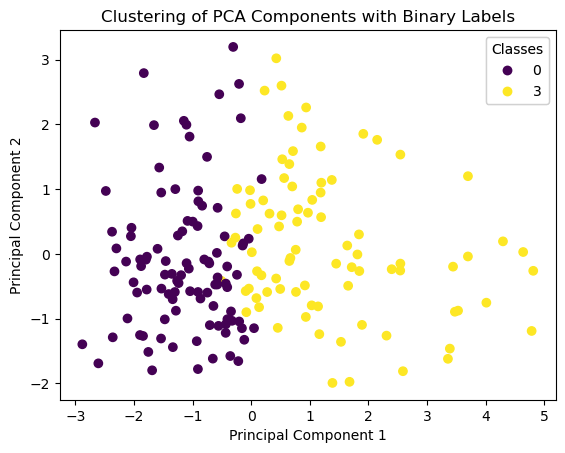

In [14]:
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=Labels2)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of PCA Components with Binary Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\PCA Analysis with Binary Labels.png')

In [15]:
curPlace = os.getcwd() + '\\output files\\UMAP Analysis.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
x = data[:,2]
y = data[:,3]

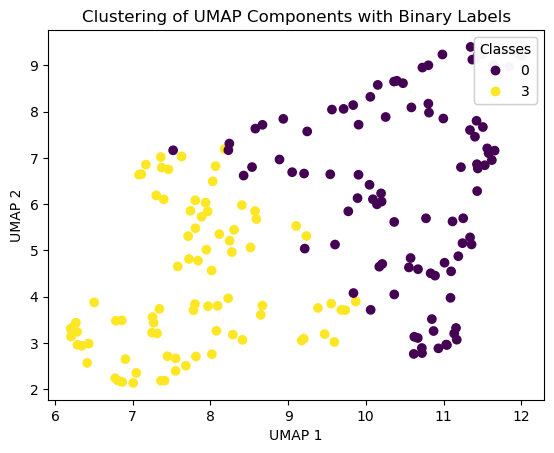

In [16]:
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=Labels2)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Clustering of UMAP Components with Binary Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\UMAP Analysis with Binary Labels.png')

In [17]:
curPlace = os.getcwd() + '\\output files\\TSNE Analysis.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
x = data[:,2]
y = data[:,3]

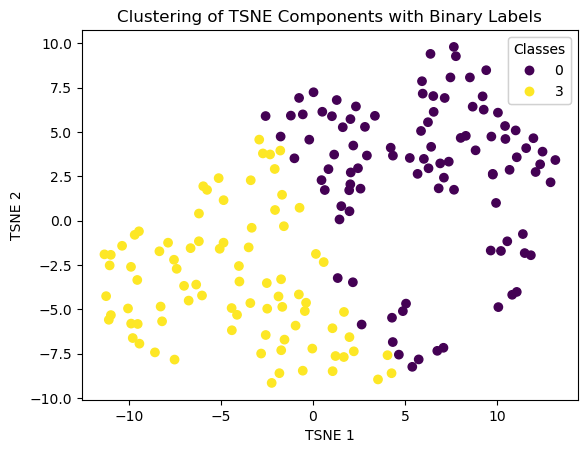

In [18]:
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=Labels2)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Clustering of TSNE Components with Binary Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\TSNE Analysis with Binary Labels.png')

## Reading the Binary Consensus Labels

In [19]:
data = pd.read_excel(os.getcwd() + '\\output files\\CombinedDataWithLabels.xlsx')
data = data.to_numpy()
s = np.shape(data)
rows = s[0]

## Finding a Low and a High Score

In [20]:
i = 0
foundBad = False
foundGood = False
while i < rows:
    curBinVal = data[i,7]
    
    if curBinVal == 'bad' and foundBad == False:
        badName = i
        foundBad = True
        print('bad:' + str(i))
    if curBinVal == 'good' and foundGood == False:
        goodName = i
        foundGood = True
        print('good:' + str(i))

    i = i + 1

bad:0
good:2


## Making the Min and Max Binary Labels Figure

In [21]:
curPlace = os.getcwd()
Place = curPlace + '\\data'
placePath = pathlib.Path(Place)
allFiles = list(placePath.iterdir())

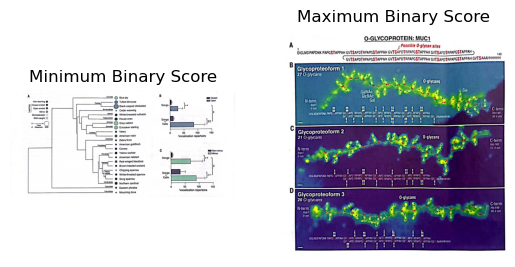

In [22]:
minImgPath = str(allFiles[badName])
maxImgPath = str(allFiles[goodName])

minImg = cv2.imread(minImgPath)
minImg = cv2.cvtColor(minImg, cv2.COLOR_BGR2RGB)
maxImg = cv2.imread(maxImgPath)
maxImg = cv2.cvtColor(maxImg, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(minImg)
plt.title('Minimum Binary Score')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(maxImg)
plt.title('Maximum Binary Score')
plt.axis('off')
plt.savefig(os.getcwd() + '\\figure outputs\\Min and Max Binary Score.png')